## GRADIENT DESCENT (GRADYAN İNİŞİ)

`Gradient Descent` yöntemi, birbirinden farklı problemler için optimum sonucu bulabilme yeteneğine sahip bir **eniyileme/optimizasyon** algoritmasıdır. Gradient Descent yöntemindeki anafikir, *parametreleri her iterasyonda tekrar revize ederek/ayarlayarak maliyet fonksiyonunu en aza indirmektir.*

Bununla birlite Gradient Descent yöntemi, neredeysa bütün Machine Learning algoritmaları için kullanılır ve bu algoritmaların çalışma mantığını içselleştirmek bakımından oldukça mühimdir.

***

### DATA OLUŞTURALIM

* Gradient Descent yöntemini incelemek üzere kendi örnek verimizi yaratalım.

In [1]:
# Gerekli kütüphaneleri import edelim.

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# np.random modülünü kullanarak 100 adet random değişken üretiyoruz ve bu değişkenleri 2 ile çarpıyoruz.
# Böylece 0 - 2 aralığında 100 adet değer üretmiş oluyoruz.

X = 2 * np.random.rand(100 , 1)

In [3]:
# Ürettiğimiz değerleri görelim.

print(X)

[[1.56956808e+00]
 [9.40733761e-01]
 [1.68717416e+00]
 [8.37389058e-01]
 [1.52676037e+00]
 [1.18035521e+00]
 [1.43886142e+00]
 [1.83410254e+00]
 [1.74732857e-01]
 [2.72177350e-01]
 [1.73982845e+00]
 [2.06980647e-01]
 [1.56789608e+00]
 [1.71150730e+00]
 [6.43144840e-01]
 [2.94890528e-01]
 [1.65502279e+00]
 [1.45691504e+00]
 [1.35221458e+00]
 [1.06974283e+00]
 [9.35405239e-01]
 [2.14693848e-01]
 [1.84076673e+00]
 [2.79235832e-01]
 [1.94401306e+00]
 [1.51813875e+00]
 [7.15001325e-01]
 [1.48879908e+00]
 [1.31039102e+00]
 [1.40366202e+00]
 [1.98019763e+00]
 [1.27786757e+00]
 [1.77999837e+00]
 [1.56248102e+00]
 [1.60871987e+00]
 [1.20263732e+00]
 [1.95472339e+00]
 [1.72276752e+00]
 [7.05695458e-01]
 [1.49561424e+00]
 [1.72784840e+00]
 [2.84579414e-01]
 [8.17720357e-01]
 [6.89869613e-01]
 [1.09615176e+00]
 [1.94369250e-02]
 [4.98722947e-01]
 [1.86953164e+00]
 [9.95776871e-01]
 [1.36244968e-01]
 [6.18254118e-01]
 [1.32470279e+00]
 [2.42193286e-02]
 [1.61182195e+00]
 [7.21362010e-01]
 [1.195828

In [4]:
# Ürettiğimiz değer listesinin veri tipini öğrenelim.

type(X)

numpy.ndarray

***

**Normalde X ile y arasındaki ilişkiyi önceden bilemeyiz. Bunu, önceki konularda X ile y arasındaki ilişkiyi bulmak için Regresyon modelleri kullanırken öğrenmiştik. Ancak, şu anki senaryoya göre X ile y değerleri arasındaki ilişkiyi bildiğimizi farz ederek işlemlerimizi gerçekleştireceğiz.**

***

In [5]:
# X ile y değerleri arasındaki, önceden bilgisine sahip olduğumuzu varsaydığımız, ilişki.

# 4 : intercept
# 3 : coefficient of X
# np.random.rand(100, 1) : Error Term

y = 4 + 3 * X + np.random.rand(100, 1)

In [6]:
# y değerini görelim

print(y)

[[ 8.77248408]
 [ 7.46199248]
 [ 9.97407832]
 [ 7.43754951]
 [ 8.66540705]
 [ 8.02800979]
 [ 8.75472146]
 [10.06348536]
 [ 5.3088695 ]
 [ 5.47605999]
 [ 9.45733355]
 [ 5.51916456]
 [ 9.45275296]
 [ 9.45988539]
 [ 6.4747393 ]
 [ 4.96174457]
 [ 9.2968593 ]
 [ 8.86038361]
 [ 8.87158313]
 [ 8.02871358]
 [ 7.11180692]
 [ 5.38288843]
 [ 9.65998949]
 [ 4.92999948]
 [10.81381454]
 [ 9.36075145]
 [ 6.99888113]
 [ 9.25020759]
 [ 8.02277208]
 [ 8.25161313]
 [10.52510111]
 [ 8.22584731]
 [10.31047521]
 [ 9.32382907]
 [ 9.54621194]
 [ 8.07786641]
 [10.61264091]
 [ 9.691152  ]
 [ 6.44864886]
 [ 9.06975808]
 [ 9.94622146]
 [ 4.86058855]
 [ 7.07165932]
 [ 7.06256201]
 [ 8.25690562]
 [ 4.61056294]
 [ 5.60403603]
 [ 9.80032697]
 [ 7.57973073]
 [ 4.85555168]
 [ 6.7949089 ]
 [ 8.60496997]
 [ 4.81204777]
 [ 8.8864763 ]
 [ 7.15177892]
 [ 7.96952399]
 [ 7.63726935]
 [ 9.02202818]
 [ 8.81131554]
 [ 8.16942505]
 [ 7.6481214 ]
 [ 6.8517322 ]
 [ 6.514575  ]
 [ 8.54467214]
 [ 6.5993056 ]
 [10.5323642 ]
 [ 6.84933

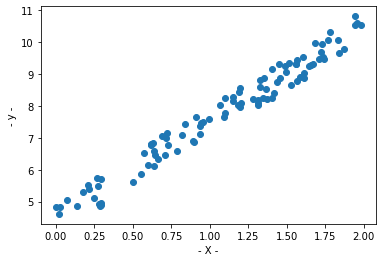

In [7]:
# X ile y arasındaki ilişkiyi görselleştirelim.

plt.scatter(X, y)
plt.xlabel("- X -")
plt.ylabel("- y -")
plt.show()

*Görüldüğü üzere X ile y arasındaki ilişki `lineer`'dir.

**X ile y arasındaki ilişkiyi bildiğimizi farz ederek yukarıdaki işlemleri gerçekleştirdik. Bu ilişkiye dair bilgi sahibi olmamızı sağlayan etken `intercept` ve `coefficient` değerlerininin tarafmızca belirlenmesidir. Böylece X ile y arasındaki ilişkiyi bildiğimiz senaryoyu gözlemleyerek regresyon modelini anımsamış olduk. Şimdi de gerçek X - y ilişkisinin fonksiyonunu yazalım.**

### $$ y = w_0 + w_1X + \epsilon $$

Burada;

* $w_0$ = $\beta_0$
* $w_1$ = $\beta_1$
* $\epsilon$ = Error Rate

* Burada $w_0$ ve $w_1$ değerleri W (weight) adlı bir matris içerisinde tutulup vektör olarak formatlanabilir.
    * W vektörü: $W = [w_0 \ w_1]$

X-y arasındaki ilişkiyi bildiğimiz senaryoyu yeniden ele alalım. Intercept ve coefficient değerlerini regresyon denkleminde yerine koyarsak aşağıdaki sonucu elde ediyorduk:<br> 
### $$y = 4 + 3 * X + np.random.rand(100,1)$$<br>

Buna göre;
#### $$w_0 = 4$$
#### $$w_1 = 3$$
olur.<br>

<br>Vektör kullanarak gösterecek olursak;
### $$y = WX + \epsilon$$
şeklinde bir sonuç elde ederiz.<br>

<br>Burada $W$ ile $X$ vektörlerinin $WX$ şeklinde gösterimi, W ile X'in *vektörel çarpımı*, `Dot Product (İç Çarpım)`'ıdır. Bu vektörel çarpım aslında; 
### $$\hat y = w_0 + w_1*x_1 + w_2*x_2 + ... + w_n*x_n + \epsilon$$
ifadesi ile eşdeğerdir.

* Yukarıda, vektörler ile yeniden yazdığımız denklemi analitik olarak çözümleyebiliriz.

**NOT:** Makine öğrenmesinde vektörler; genellikle tek sütunlu 2-boyutlu diziler şeklinde, sütun vektörü olarak gösterilir. Eğer $W$ ve $X$ sütun vektörleri ise, tahmin $\hat y = W^{T}X$ olur. Bu denklemde $W^{T}$, $W$'nin transpozudur, yani sütun vektörü yerine satır vektörüdür ve $W^{T}X$, $W^{T}$ ile $X$'in matris çarpımıdır. Elbette tahmin aynı tahmindir ancak tek bir fark söz konusudur: tahmin, artık skaler bir değer yerine tek hücreli bir matristir.

### ANALİTİK ÇÖZÜM

$y = WX + \epsilon$ denkleminin analitik çözümünü vektörler üzerinden gerçekleştirmeden önce Lineer Regresyon Yöntemi'ni kullanırken gerçekleştirdiğimiz analitik çözüm üzerinden gidelim. 

Least Squares Method (En Küçük Kareler Yöntemi), birbirine bağlı olarak değişen iki fiziksel büyüklük arasındaki ilişkiyi mümkün olduğunca gerçeğe uygun bir denklem olarak yazmak için kullanılan standart bir regresyon yöntemidir. Bir başka deyişle bu yöntem, ölçüm sonucu elde edilmiş veri noktalarına “mümkün olduğu kadar yakın” geçecek bir işlev eğrisi bulmaya yarar. Gauss-Markov Teoremi’nin en küçük kareler yöntemi, regresyon için optimal yöntemdir.

Bir diğer ifadeyle; Least Squares Method, RSS değerini minimize ederek en iyi $w_0$ ve $w_1$ değerlerini tahmin eder.

Herhangi bir $x_i$ için tahmin denklemi;
### $$ \hat y^{(i)} = \hat w_0 + \hat w_1 x^{(i)} $$

Burada;
* $x^{(i)}$: Veri setindeki $i^{inci}$ örneğin, etiketi(label) hariç tüm niteliklerinin değerlerini içeren bir vektördür.
* $\hat y^{(i)}$: Veri setindeki $i^{inci}$ örneğin etiketi, yani o örnek için istenen çıktı değeri.

<br>Genel olarak:
* **Değişkenler** için (x'in sütunları) alt index **($x_i$)** kullanılır.
* **Veriler** için (satır) üst index **($x^{(i)}$)** kullanılır

Burada **X**'ler, yani girdi değerleri, bilindiğine göre, tahmin etmeye çalıştığımız değişkenler(katsayılar/coefficients), $w_0$ ve $w_1$'dir


**NOT**: Katsayılar(Coefficients) için aşağıdaki gösterimler kullanılabilir:
* $w$
* $\theta$
* $\beta$ 

Bu noktadan itibaren gerçekleştirmek istediğimiz Tahmin için çalışmaya başlayalım.

***

Tahmin işlemini yukarıda bahsettiğimiz **Least Squares Method** ile gerçekleştiririz. Bunun yanında, Least Squares Method'un bir türü olan **Ordinary Least Squares Method**'u kullanacağız. 

<br>Ordinary Least Squares(OLS), Linear Regression modelinde bilinmeyen parametreleri tahmin etmek için kullanılan bir tür lineer Least Squares Method'dur. OLS, açıklayıcı değişkenler kümesinin doğrusal bir fonksiyonunun parametrelerini en küçük kareler ilkesine göre seçer: verilen veri kümesinde gözlemlenen bağımlı değişken (gözlemlenen değişkenin değerleri) ile bağımsız değişkenin doğrusal fonksiyonu tarafından tahmin edilenler arasındaki farkların karelerinin toplamını en aza indirir.

**Hatırlatma**
Herhangi bir **i** noktasındaki hata: $$e^{(i)} = \hat y^{(i)} - y^{(i)}$$
**<br>Herhangi Bir Noktadaki Hata Değeri = O Noktanın Tahmin Edilen Değeri - O Noktanın Gerçek Değeri** 

**e: Residual Error**

**RSS: Residual Sum of Squares**
$$RSS = e^2_1 + e^2_2 + e^2_3 +...+ e^2_n$$

**Özetle, Least Square Method, RSS değerini minimize ederek en iyi $w_0$ ve $w_1$ değerlerini tahmin eder.**

***

### MATEMATİKSEL GÖSTERİM

### $$ \hat w_1 = \frac{\sum_{i=1}^n (x^{(i)} - \overline x)(y^{(i)} - \overline y)}{\sum_{i=1}^n (x^{(i)} - \overline x)^2} $$

### $$ \hat w_0 = \overline y - \hat w_1 \overline x $$

Burada:

### $$ \overline y = \frac{1}{n} \sum_{i=1}^n y^{(i)} $$

### $$ \overline x = \frac{1}{n} \sum_{i=1}^n x^{(i)} $$

Bu noktaya kadar elde ettiğimiz bilgilerden sonra şu ifadeyi ekleyelim: çoğu zaman Analitik Yöntem kullanarak çözüme ulaşmak mümkün olmaz çünkü üzerinde çalıştığımız veriler oldukça fazladır. X, W ve y'nin aslında birer `matris` olduğunu ve X matrisinin çoğu çalışmada yüksek boyutlara sahip olduğunu göz önünde bulundurursak vardığımız bu sonuç daha anlaşılır hale gelecektir. Bununla birlikte Analitik Yöntem kullanırken, W değerlerini bulmak için çok fazla Matrix Çarpımı yapılması gerekir ki bu, bilgisayarların GPU ve CPU donanımlarını ciddi oranda yoran bir işlemdir.

Peki bu problemin üstesinden nasıl geleceğiz ya da nasıl daha etkili bir yöntem bulacağız. Cevap: YAKINSAYARAK.

**Problemin Tanımı**

Toplam Hatayı minimize edecek $w_0$ ve $w_1$ değerlerini yani katsayıları bulmak.

Toplam Hata, $w_0$ ve $w_1$ değişkenlerine bağlı bir Convex Fonksiyonudur. Bunun sebebi, Toplam Hatanın karesel değerlerin toplamı sonucunda bulunmasıdır.

<img src="images/globalminimum.png"/>

### TERİMLER

#### COST FUNCTION (MALİYET FONKSİYONU)

Lineer regresyonda **tahmin edilen y** değeri ile **gerçek y değeri** arasındaki hatayı minimuma indirebilmek için öyle **w değerleri** bulmalıyız ki Maliyet Fonksiyonu minimize edilebilsin. Maliyet Fonksiyonunun basit tanımı, gerçek y değerleri ile tahmin edilen y değerleri arasındaki fark şeklinde ifade edilebilir. Maliyet Fonksiyonu şu notasyonla gösterilir:
### $$ J(w) = \frac{1}{2n} \sum_{i=1}^n (\hat y^{(i)} - y^{(i)})^2 $$

Cost Funtion aslında MSE(Mean Square Error)'nin özel bir formudur. Hatırlatmak için:
### $$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat y_i)^2 $$

#### GRADIENT

Cost Function'ın değişkenlere(W değerleri) göre değişim miktarı(Türevi) 

### $$ J(w) = \frac{1}{2n} \sum_{i=1}^n (\hat w_0 + \hat w_1x^{(i)} - y^{(i)})^2 $$

$w_0$'a göre kısmi türev:

### $$ \frac{\partial J(w)}{\partial w_0} = \frac{1}{n} \sum_{i=1}^n (\hat w_0 + \hat w_1x^{(i)} - y^{(i)}) $$

### $$ \frac{\partial J(w)}{\partial w_0} = \frac{1}{n} \sum_{i=1}^n (\hat y^{(i)} - y^{(i)}) $$

$w_1$'e göre kısmi türev:

### $$ \frac{\partial J(w)}{\partial w_1} = \frac{1}{n} \sum_{i=1}^n (\hat w_0 + \hat w_1x^{(i)} - y^{(i)}) x^{(i)} $$

### $$ \frac{\partial J(w)}{\partial w_1} = \frac{1}{n} \sum_{i=1}^n (\hat y^{(i)} - y^{(i)}) x^{(i)} $$

Bu noktada, Cost Function(J)'ın **W** değerlerine göre nasıl değiştiğini, yani türevini, her bir $x^{(i)}$ ve $y^{(i)}$ noktasında bildiğimize göre bunu kullanabiliriz. 

**Bu türeve *Gradient* adı verilir. Kısacası Gradient, J'nin W değerlerine göre nasıl değiştiğini bize söyleyen değişim vektörüdür.**

Gradient'in W vektörü üzerinden genel gösterimi:
### $$ \frac{\partial J(W)}{\partial W_j} = \frac{1}{n} \sum_{i=1}^n (\hat y^{(i)} - y^{(i)}) X_j^{(i)} $$

<img src="images/cost_function.jpeg"/>

### Gradient Descent Nasıl Çalışır?

1. Önce bir başlangıç noktası seçilir ($w_0$ ve $w_1$)
2. Bu noktası için Cost Function değeri **J(w)** hesaplanır
3. Bu J(w) değeri üzerinden $w_0$ ve $w_1$ için **Gradient** hesaplanır
4. Bu Gradient'in **negativ** değeri alınır (amacımız Cost Function'ı azaltmak çünkü)
5. Bu negatif değer bir learning rate **$\alpha$** ile çarpılır
6. Bu çarpım sonucu ilgili $w$ değerinden çıkarlır
7. Döngü tekrar 1. adımdan devam eder (Belirlenen iteration-döngü sayısında)

**Gradient Descent Akışı**

Iterasyonlar üzerinen: $W$ yu update edeceğiz:

**j**: iterasyon numarası

### $$ W_j := W_j - \alpha (\frac{1}{n} \sum_{i=1}^n (\hat y^{(i)} - y^{(i)}) X_j^{(i)}) $$

Burada **$\alpha$ : learning rate**